In [1]:
#Import Dependencies
import sklearn
import tensorflow
import keras
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
#Veriable Creation

mp_holistic = mp.solutions.holistic             # Loades The Model (Holistic Model) To make detection
mp_drawing_utils = mp.solutions.drawing_utils   # draws the key points

In [3]:
#BGI to RGB for mediapipe as media pipe need RGB format

def mediapipe_detection(image, model):
    images = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # color Convertion BGR to RGB
    images.flags.writeable = False                    # image will no longer writable
    result = model.process(image)                  # make Pridiction
    images.flags.writeable = True                     # image will writable again
    images = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # color Convertion RGB to BGR
    return images, result

In [4]:
#Drawing The Landmarks on The Frames

def draw_landmarks(image, results):
    mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    #mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw Face Connections
    mp_drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw Pose Connection
    mp_drawing_utils.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw Left Hand Connection
    mp_drawing_utils.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw Right Hand Connectio

In [5]:
# Drawing The Landmarks in Different Style

def draw_landmarks_style(image, results):
    # Draw Face Connections
    mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                                    mp_drawing_utils.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                    mp_drawing_utils.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
                                    )
    #mp_drawing_utils.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw Face Connections
    # Draw Pose Connection
    mp_drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                    mp_drawing_utils.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                    mp_drawing_utils.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
                                    )
    # Draw Left Hand Connection
    mp_drawing_utils.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                    mp_drawing_utils.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                    mp_drawing_utils.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
                                    )
    # Draw Right Hand Connection
    mp_drawing_utils.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                    mp_drawing_utils.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                    mp_drawing_utils.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                                    )

In [15]:
#Keypoint using Mediapipe *Holistic*

cap = cv2.VideoCapture(0)
#Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    while cap.isOpened():
        # read Feed (camera Video Frame)
        ret, frame = cap.read()

        # Make Detection
        image, results = mediapipe_detection(frame, holistic)
        """print(results) # Prints The Results
        print("Face Landmarks \n")
        print(results.face_landmarks) # Face Landmarks
        print("Pose Landmarks \n")
        print(results.pose_landmarks) # Pose Landmarks
        print("Left Hand Landmarks \n")
        print(results.left_hand_landmarks) # Left Hand Landmarks
        print("Right Hand Landmarks \n")
        print(results.right_hand_landmarks) # Right Hand Landmarks
        print("count \n")
        print(results.count)
        print("index \n")
        print(results.index)
        print("mro \n")
        print(results.mro)"""

        # Draw Landmarks in Style
        draw_landmarks_style(image, results)

        # Draw Landmarks in  normal
        #draw_landmarks(image, results)

        # Output To Screan
        cv2.imshow('OpenCV Feed', image)

        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows() #destroys windows

In [16]:
# Extract Keypoint Values

pose = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    pose.append(test)
print(results.face_landmarks.landmark)
print(len(results.face_landmarks.landmark))
print(len(pose))
print(pose)

[x: 0.4847332537174225
y: 0.5607706904411316
z: -0.02086430974304676
, x: 0.47845345735549927
y: 0.5223453640937805
z: -0.04789825528860092
, x: 0.48042815923690796
y: 0.5315470695495605
z: -0.02294684760272503
, x: 0.4657663404941559
y: 0.4837266802787781
z: -0.03908475115895271
, x: 0.4769727289676666
y: 0.5110936164855957
z: -0.05203023925423622
, x: 0.47509005665779114
y: 0.49480757117271423
z: -0.04975802078843117
, x: 0.47081753611564636
y: 0.45340460538864136
z: -0.029079845175147057
, x: 0.40412405133247375
y: 0.4580456614494324
z: 0.007180655840784311
, x: 0.467718243598938
y: 0.4254109263420105
z: -0.02584778144955635
, x: 0.4660765826702118
y: 0.41045650839805603
z: -0.029277577996253967
, x: 0.4591994881629944
y: 0.3523567318916321
z: -0.02492353692650795
, x: 0.48551031947135925
y: 0.5659894943237305
z: -0.01888495869934559
, x: 0.48600924015045166
y: 0.5693868398666382
z: -0.015302754007279873
, x: 0.48619896173477173
y: 0.5703535676002502
z: -0.010889315977692604
, x: 0.

In [17]:
def extract_keypoints(results):
    face = pose = np.array([[res.x, res.y, res.z] for res in
                            results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in
                     results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    rh = np.array([[res.x, res.y, res.z] for res in
                   results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(
        21 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in
                   results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)

    return np.concatenate([pose, face, lh, rh])

In [18]:
#   Setting Up The Folders for Collection

result_test = extract_keypoints(results)
print(result_test)
np.save('0', result_test)
np.load('0.npy')

[ 0.48477378  0.51365644 -0.99323809 ...  0.          0.
  0.        ]


array([ 0.48477378,  0.51365644, -0.99323809, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
#   Path For the Exported Data, numpy Arrays

DATA_PATH = os.path.join('MP_Data_VI_UPD')

In [20]:
#   Actions that we try to detect or Labels

actions = np.array(['Bye', 'Hi', 'We are Engineers'])

In [21]:
# In Action Detection We Need a Sequence of Frames rather than a Single Frame

no_sequences = 20       # Number Of Sequence Given or Equivalent to 20 videos data
sequence_length = 30    # Length Of The Sequence Given or 30 numbers of frame in each Video

In [22]:
# Data acquisition loop by Actions and Number of Sequences

for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [23]:
# Collecting The Keypoins data

cap = cv2.VideoCapture(0)
#Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    # Loop by Actions
    for action in actions:
        # Loop By Sequences 0...29
        for sequence in range(no_sequences):
            # Loop By length of Video or Sequence
            for frame_num in range (sequence_length):

                # read Feed (camera Video Frame)
                ret, frame = cap.read()

                # Make Detection
                image, results = mediapipe_detection(frame, holistic)
                # Draw Landmarks in Style
                draw_landmarks_style(image, results)

                # Draw Landmarks in  normal
                # draw_landmarks(image, results)

                # Apply Collection Logic To Pause The Video While Collection
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection Of Frames', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting Frames for {} video number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting Frames for {} video number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # new Export Key Points
                Keypoint = extract_keypoints(results)
                #print("Keypoints: \n")
                #print(Keypoint)
                npy_path = os.path.join(DATA_PATH, action, str(sequence),str(frame_num))
                np.save(npy_path, Keypoint)

                # Output To Screan
                cv2.imshow('OpenCV Feed', image)

                # break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()  # destroys windowsq

In [24]:
# Preprocessing The Data and Create Lables and Features

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

label_map = {label : num for num, label in enumerate(actions)}
print(label_map)

sequences, labels = [], [] # sequences represents Feature Data or X data and Labels represents Y or Label Data
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

{'Bye': 0, 'Hi': 1, 'We are Engineers': 2}


In [25]:
print(sequences)
print(np.array(sequences).shape)
print(labels)
print(np.array(labels).shape)

[[array([ 0.48661718,  0.53333074, -0.8579132 , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.48914343,  0.54298317, -1.17570829, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.49081644,  0.54729325, -1.0848105 , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.49292868,  0.54823476, -1.33721781, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.49388379,  0.54862034, -1.41458368, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.49351567,  0.55585843, -1.24810004, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.48633894,  0.55637896, -1.1861465 , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.48366103,  0.55561107, -1.16301978, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.48064533,  0.55866456, -1.21923363, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.48080215,  0.55825824, -1.1130861 , ...,  0.        ,
        0.        ,  0.        ]), array([ 

In [26]:
# PreProcess

X = np.array(sequences)
print(X.shape)

Y = to_categorical(labels).astype(int)
print(Y) # [1,0,0] Bye [0,1,0] Hi [0, 0, 1] We are Engineers

(60, 30, 1662)
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [27]:
#Train And Test Split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05) # test_size=0.05 means Test Pertition will be 5% of our Data
print(x_train.shape)  # Shape of the training input data
print(x_test.shape)   # Shape of the testing input data
print(y_train.shape)  # Shape of the training target data
print(y_test.shape)   # Shape of the testing target data

(57, 30, 1662)
(3, 30, 1662)
(57, 3)
(3, 3)


In [28]:
# Build and Train The LSTM Neural Network

from keras.models import Sequential # Sequential Neural Network
from keras.layers import LSTM, Dense # LSTM Layer for Action Detection
from keras.callbacks import TensorBoard # Trace and Monitor Our Model

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [29]:
# Building The Neural Network Architecture

model = Sequential() # Instantiating the model
# There is the three sets of LSTM layer
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662))) # 64 LSTM Units 30 Frames 1662 Keypoints
model.add(LSTM(128, return_sequences=True, activation='relu')) # 128 LSTM Units
model.add(LSTM(256, return_sequences=True, activation='relu')) # 256 LSTM Units
model.add(LSTM(128, return_sequences=True, activation='relu')) # 128 LSTM Units
model.add(LSTM(64, return_sequences=False, activation='relu')) # 64 LSTM the return_sequences is false here as the next layer is the Dence Layer Not a LSTM Layer
model.add(Dense(64, activation='relu')) # 64 Dense units fully Connected layers
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # as activation='softmax' so it will return a value which has a probability betwwen  0 to 1

In [46]:
# Building The Neural Network Architecture

model = Sequential() # Instantiating the model
# There is the three sets of LSTM layer
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662))) # 64 LSTM Units 30 Frames 1662 Keypoints
model.add(LSTM(128, return_sequences=True, activation='relu')) # 128 LSTM Units
model.add(LSTM(256, return_sequences=True, activation='relu')) # 256 LSTM Units
model.add(LSTM(512, return_sequences=True, activation='relu')) # 512 LSTM Units
model.add(LSTM(1024, return_sequences=True, activation='relu')) # 1024 LSTM Units
model.add(LSTM(512, return_sequences=True, activation='relu')) # 512 LSTM Units
model.add(LSTM(256, return_sequences=True, activation='relu')) # 256 LSTM Units
model.add(LSTM(128, return_sequences=True, activation='relu')) # 128 LSTM Units
model.add(LSTM(64, return_sequences=False, activation='relu')) # 64 LSTM the return_sequences is false here as the next layer is the Dence Layer Not a LSTM Layer
model.add(Dense(64, activation='relu')) # 64 Dense units fully Connected layers
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # as activation='softmax' so it will return a value which has a probability betwwen  0 to 1

In [53]:
# Building The Neural Network Architecture

model = Sequential() # Instantiating the model
# There is the three sets of LSTM layer
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662))) # 64 LSTM Units 30 Frames 1662 Keypoints
model.add(LSTM(128, return_sequences=True, activation='relu')) # 128 LSTM Units
model.add(LSTM(256, return_sequences=True, activation='relu')) # 256 LSTM Units
model.add(LSTM(512, return_sequences=True, activation='relu')) # 512 LSTM Units
model.add(LSTM(1024, return_sequences=True, activation='relu')) # 1024 LSTM Units
model.add(LSTM(512, return_sequences=True, activation='relu')) # 512 LSTM Units
model.add(LSTM(256, return_sequences=True, activation='relu')) # 256 LSTM Units
model.add(LSTM(128, return_sequences=True, activation='relu')) # 128 LSTM Units
model.add(LSTM(64, return_sequences=False, activation='relu')) # 64 LSTM the return_sequences is false here as the next layer is the Dence Layer Not a LSTM Layer
model.add(Dense(64, activation='relu')) # 64 Dense units fully Connected layers
model.add(Dense(64, activation='relu')) # 64 Dense units fully Connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # as activation='softmax' so it will return a value which has a probability betwwen  0 to 1

In [47]:
res = [.7,.5,.4]
print(actions[np.argmax(res)])

res = [.7,.8,.4]
print(actions[np.argmax(res)])

res = [.1,.2,.4]
print(actions[np.argmax(res)])

Bye
Hi
We are Engineers


In [52]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=10, callbacks=[tb_callback]) # tensorboard --logdir=.

Epoch 1/10
2/2 [==============================] - 75s 6s/step - loss: 72.5807 - categorical_accuracy: 0.3509
Epoch 2/10
2/2 [==============================] - 15s 6s/step - loss: 1.1888 - categorical_accuracy: 0.3158
Epoch 3/10
2/2 [==============================] - 15s 6s/step - loss: 1.1103 - categorical_accuracy: 0.3158
Epoch 4/10
2/2 [==============================] - 15s 7s/step - loss: 1.1103 - categorical_accuracy: 0.3158
Epoch 5/10
2/2 [==============================] - 21s 9s/step - loss: 1.1100 - categorical_accuracy: 0.3158
Epoch 6/10
2/2 [==============================] - 16s 6s/step - loss: 1.1098 - categorical_accuracy: 0.3158
Epoch 7/10
2/2 [==============================] - 14s 6s/step - loss: 1.1096 - categorical_accuracy: 0.3158
Epoch 8/10
2/2 [==============================] - 13s 6s/step - loss: 1.1086 - categorical_accuracy: 0.3158
Epoch 9/10
2/2 [==============================] - 14s 6s/step - loss: 1.1073 - categorical_accuracy: 0.3158
Epoch 10/10
2/2 [==========

In [54]:
print(model.summary()) # Summery of The Model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_24 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_25 (LSTM)              (None, 30, 256)           394240    
                                                                 
 lstm_26 (LSTM)              (None, 30, 512)           1574912   
                                                                 
 lstm_27 (LSTM)              (None, 30, 1024)          6295552   
                                                                 
 lstm_28 (LSTM)              (None, 30, 512)           3147776   
                                                                 
 lstm_29 (LSTM)              (None, 30, 256)          

In [55]:
# Make Predictions

result_x_test = model.predict(x_test)

print(np.sum(result_x_test))
print(actions[np.argmax(result_x_test[0])])
print(actions[np.argmax(y_test[0])])

1/1 [==============================] - 4s 4s/step
3.0
Bye
Bye


In [56]:
# Save The Model
model.save('action1_V1_UPD_1.h5')

In [35]:
# Reloade The Model
model.load_weights('action1_V1_UPD_1.h5')

In [49]:
model.load_weights('C:/Users/anupa/Downloads/action1_V1_Colab_UPD.h5')

In [36]:
#Evalution Using Confusion Matrix and Accuracy

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(x_test)
yTrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

print(multilabel_confusion_matrix(yTrue, yhat))
print(accuracy_score(yTrue, yhat))

yhat = model.predict(x_train)
yTrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

print(multilabel_confusion_matrix(yTrue, yhat))
print(accuracy_score(yTrue, yhat))

1/1 [==============================] - 0s 86ms/step
[[[0 2]
  [0 1]]

 [[1 0]
  [2 0]]]
0.3333333333333333
2/2 [==============================] - 1s 178ms/step
[[[ 1 37]
  [ 1 18]]

 [[38  1]
  [17  1]]

 [[37  0]
  [20  0]]]
0.3333333333333333


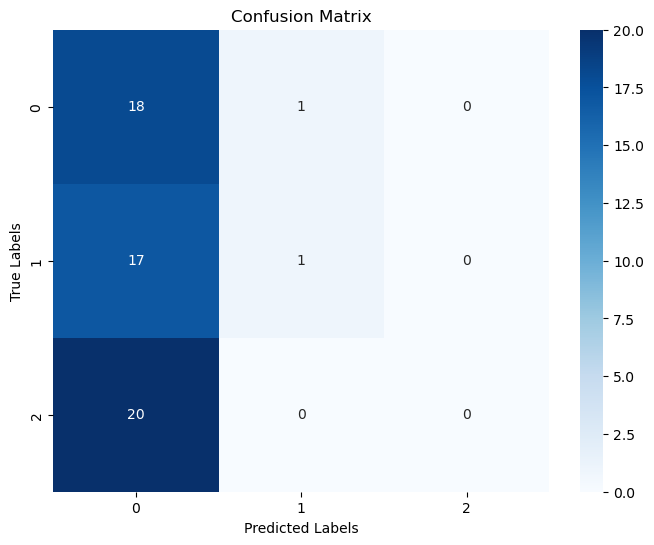

Accuracy: 0.3333333333333333


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute the confusion matrix
cm = confusion_matrix(yTrue, yhat)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Compute and print the accuracy
accuracy = accuracy_score(yTrue, yhat)
print("Accuracy:", accuracy)

In [38]:
# Test Prediction VIew Bar

from scipy import stats

colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]

In [39]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                    cv2.LINE_AA)

    return output_frame

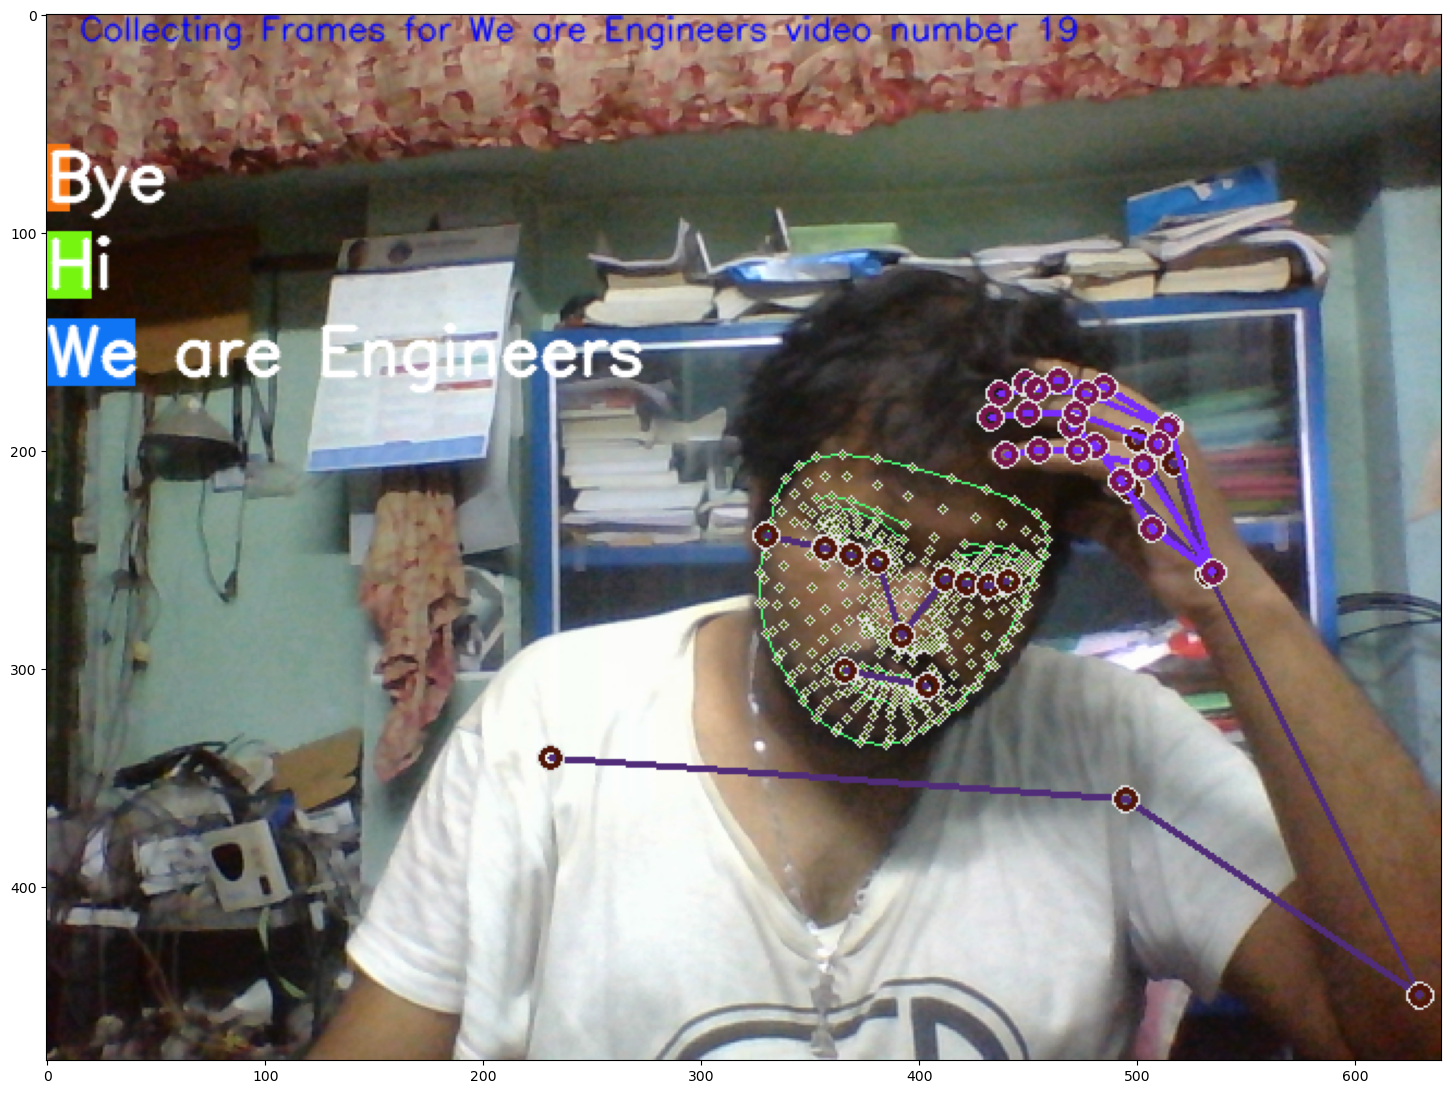

In [40]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [41]:
# Test In Real Time

sequence = []
sentence = [] # Concadination Of Words
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)
#Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    while cap.isOpened():
        # read Feed (camera Video Frame)
        ret, frame = cap.read()

        # Make Detection
        image, results = mediapipe_detection(frame, holistic)
        #print(results) # Prints The Results
        #print(results.face_landmarks) # Face Landmarks
        #print(results.pose_landmarks) # Pose Landmarks
        #print(results.left_hand_landmarks) # Left Hand Landmarks
        #print(results.right_hand_landmarks) # Right Hand Landmarks
        #print(results.count)
        #print(results.index)
        #print(results.mro)

        # Draw Landmarks in Style
        draw_landmarks_style(image, results)

        # Prediction Logic

        KeyPoints = extract_keypoints(results)
        # sequence.insert(0, KeyPoints)
        # sequence = sequence[:30]
        sequence.append(KeyPoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # Visualization Logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence)>0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Draw Landmarks in  normal
        #draw_landmarks(image, results)

        # Output To Screan
        cv2.imshow('OpenCV Feed', image)

        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 90ms/step
Bye
1/1 [==============================] - 0s 78ms/step
Bye
1/1 [==============================] - 0s 73ms/step
Bye
1/1 [==============================] - 0s 76ms/step
Bye
1/1 [==============================] - 0s 69ms/step
Bye
1/1 [==============================] - 0s 90ms/step
Bye
1/1 [==============================] - 0s 78ms/step
Bye
1/1 [==============================] - 0s 62ms/step
Bye
1/1 [==============================] - 0s 66ms/step
Bye
1/1 [==============================] - 0s 80ms/step
Bye
1/1 [==============================] - 0s 69ms/step
Bye
1/1 [==============================] - 0s 78ms/step
Bye
1/1 [==============================] - 0s 83ms/step
Bye
1/1 [==============================] - 0s 69ms/step
Bye
1/1 [==============================] - 0s 78ms/step
Bye
1/1 [==============================] - 0s 82ms/step
Bye
1/1 [==============================] - 0s 68ms/step
Bye
1/1 [==============================] - 0s 89ms/s

1/1 [==============================] - 0s 100ms/step
Bye
1/1 [==============================] - 0s 64ms/step
Bye
1/1 [==============================] - 0s 63ms/step
Bye
1/1 [==============================] - 0s 78ms/step
Bye
1/1 [==============================] - 0s 65ms/step
Bye
1/1 [==============================] - 0s 68ms/step
Bye
1/1 [==============================] - 0s 102ms/step
Bye
1/1 [==============================] - 0s 75ms/step
Bye
1/1 [==============================] - 0s 68ms/step
Bye
1/1 [==============================] - 0s 95ms/step
Bye
1/1 [==============================] - 0s 96ms/step
Bye
1/1 [==============================] - 0s 66ms/step
Bye
1/1 [==============================] - 0s 83ms/step
Bye
1/1 [==============================] - 0s 79ms/step
Bye
1/1 [==============================] - 0s 59ms/step
Bye
1/1 [==============================] - 0s 63ms/step
Bye
1/1 [==============================] - 0s 73ms/step
Bye
1/1 [==============================] - 0s 63ms

In [ ]:
# Test In Real Time

sequence = []
sentence = [] # Concadination Of Words
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)
#Set Mediapipe Model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence= 0.5) as holistic:
    while cap.isOpened():
        # read Feed (camera Video Frame)
        ret, frame = cap.read()

        # Make Detection
        image, results = mediapipe_detection(frame, holistic)

        # Draw Landmarks in Style
        draw_landmarks_style(image, results)

        # Prediction Logic
        KeyPoints = extract_keypoints(results)
        sequence.append(KeyPoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # Visualization Logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence)>0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Output To Screan
        cv2.imshow('OpenCV Feed', image)

        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()